### Combined clustering

In [1]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import os.path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, AffinityPropagation
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('/content/physical.csv')
df.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


In [3]:
df.shape

(150, 12)

In [4]:
df1=pd.read_csv('/content/Mechanical properties.csv', encoding='ISO-8859-1')
df1.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,"2 (0,1,2)",NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,"5A (1,1,0)",13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,"5B (3,3,3)",9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,"5C (4,2,3)",14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,"5D-A (2,1,2)",11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN


In [5]:
df1.shape

(156, 18)

### Deleting 6 rows using list

*   Physical property has 150 rows
*   Mechanical property has 156 rows.
*   To avoid conflict, using GAD location i deleted the unused rows in mechanical property.
*   Finally i have equal no of rows in both physical and mechanical property.





In [6]:
# Remove the brackets and their contents from the first column
df1['Sample Label(Number of cores for UCS, PLI, ITS)'] = df1['Sample Label(Number of cores for UCS, PLI, ITS)'].str.replace(r'\(\d+,\d+,\d+\)', '')
df1.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN


In [7]:
# Convert the "Code" column into a list
l2 = df1['Sample Label(Number of cores for UCS, PLI, ITS)'].tolist()
l2

['2   ',
 '5A ',
 '5B ',
 '5C  ',
 '5D-A  ',
 '5D-B  ',
 '5D-C  ',
 '6   ',
 '7  ',
 '8A ',
 '8B ',
 '8C ',
 '8D ',
 '8E ',
 '8F ',
 '9A ',
 '9B ',
 '9C ',
 '10A ',
 '11A-1 ',
 '11A-2 ',
 '11A-3 ',
 '11A-4 ',
 '11A-5 ',
 '11A-6 ',
 '11A-7 ',
 '11A-8 ',
 '11A-9 ',
 '11A-10 ',
 '11A-11 ',
 '11A-12 ',
 '11A-13 ',
 '11A-14 ',
 '11A-15 ',
 '11A-16 ',
 '11A-17 ',
 '11A-18 ',
 '11A-19 ',
 '11A-20 ',
 '11B-1 ',
 '11B-2 ',
 '11B-3 ',
 '11B-4 ',
 '11B-5 ',
 '11B-6 ',
 '11B-7 ',
 '11B-8 ',
 '11B-9 ',
 '11B-10 ',
 '11B-11 ',
 '11B-12 ',
 '11B-13 ',
 '11B-14 ',
 '11B-15 ',
 '11B-16 ',
 '11B-17 ',
 '11B-18 ',
 '11B-19 ',
 '11B-20 ',
 '12B ',
 '12B-1',
 '12B-2 ',
 '12B-3 ',
 '12B-4 ',
 '12B-5 ',
 '12B-6 ',
 '12B-7 ',
 '12B-8 ',
 '12A-1 ',
 '12A-2 ',
 '12A-3 ',
 '12--1 ',
 '12--2 ',
 '13A-1 ',
 '13A-2 ',
 '13A-3 ',
 '13A-4 ',
 '13A-5 ',
 '13B-1 ',
 '13B-2 ',
 '13-1 ',
 '13-2 ',
 '14A-1 ',
 '14A-2 ',
 '14B-1 ',
 '14B-2 ',
 '14B-3 ',
 '14-1 ',
 '14-2 ',
 '14-3 ',
 '14-4 ',
 '14-5 ',
 '14-6 ',
 '20-1 ',


In [8]:
# Remove unnecessary spaces in each element of the list
l3 = [item.strip() for item in l2]
l3

['2',
 '5A',
 '5B',
 '5C',
 '5D-A',
 '5D-B',
 '5D-C',
 '6',
 '7',
 '8A',
 '8B',
 '8C',
 '8D',
 '8E',
 '8F',
 '9A',
 '9B',
 '9C',
 '10A',
 '11A-1',
 '11A-2',
 '11A-3',
 '11A-4',
 '11A-5',
 '11A-6',
 '11A-7',
 '11A-8',
 '11A-9',
 '11A-10',
 '11A-11',
 '11A-12',
 '11A-13',
 '11A-14',
 '11A-15',
 '11A-16',
 '11A-17',
 '11A-18',
 '11A-19',
 '11A-20',
 '11B-1',
 '11B-2',
 '11B-3',
 '11B-4',
 '11B-5',
 '11B-6',
 '11B-7',
 '11B-8',
 '11B-9',
 '11B-10',
 '11B-11',
 '11B-12',
 '11B-13',
 '11B-14',
 '11B-15',
 '11B-16',
 '11B-17',
 '11B-18',
 '11B-19',
 '11B-20',
 '12B',
 '12B-1',
 '12B-2',
 '12B-3',
 '12B-4',
 '12B-5',
 '12B-6',
 '12B-7',
 '12B-8',
 '12A-1',
 '12A-2',
 '12A-3',
 '12--1',
 '12--2',
 '13A-1',
 '13A-2',
 '13A-3',
 '13A-4',
 '13A-5',
 '13B-1',
 '13B-2',
 '13-1',
 '13-2',
 '14A-1',
 '14A-2',
 '14B-1',
 '14B-2',
 '14B-3',
 '14-1',
 '14-2',
 '14-3',
 '14-4',
 '14-5',
 '14-6',
 '20-1',
 '20-2',
 '21-1',
 '21-2',
 '21-3',
 '22-1',
 '22-2',
 '22-3',
 '22-4',
 '23-1',
 '23-2',
 '23-3',
 '2

In [9]:
# Convert the "Code" column into a list
l1 = df['    Block     No'].tolist()
l1

['2',
 '5A',
 '5B',
 '5C',
 '5D-A',
 '5D-B',
 '5D-C',
 '6',
 '7',
 '8A',
 '8B',
 '8C',
 '8D',
 '8E',
 '8F',
 '9A',
 '9B',
 '9C',
 '10A',
 '11A-1',
 '11A-2',
 '11A-3',
 '11A-4',
 '11A-5',
 '11A-6',
 '11A-7',
 '11A-8',
 '11A-9',
 '11A-10',
 '11A-11',
 '11A-12',
 '11A-13',
 '11A-14',
 '11A-15',
 '11A-16',
 '11A-17',
 '11A-18',
 '11A-19',
 '11A-20',
 '11B-1',
 '11B-2',
 '11B-3',
 '11B-4',
 '11B-5',
 '11B-6',
 '11B-7',
 '11B-8',
 '11B-9',
 '11B-10',
 '11B-11',
 '11B-12',
 '11B-13',
 '11B-14',
 '11B-15',
 '11B-16',
 '11B-17',
 '11B-18',
 '11B-19',
 '11B-20',
 '12B',
 '12B-1',
 '12B-2',
 '12B-3',
 '12B-4',
 '12B-5',
 '12B-6',
 '12B-7',
 '12B-8',
 '12A-1',
 '12A-2',
 '12A-3',
 '12--1',
 '12--2',
 '13A-1',
 '13A-2',
 '13A-3',
 '13A-4',
 '13A-5',
 '13B-1',
 '13B-2',
 '13-1',
 '13-2',
 '14A-1',
 '14A-2',
 '14B-1',
 '14B-2',
 '14B-3',
 '14-1',
 '14-2',
 '14-3',
 '14-4',
 '14-5',
 '14-6',
 '20-1',
 '20-2',
 '21-1',
 '21-2',
 '21-3',
 '22-1',
 '22-2',
 '22-3',
 '22-4',
 '23-1',
 '23-2',
 '23-3',
 '2

In [10]:
# Find elements in list1 but not in list2
unique_elements_in_list2 = list(set(l3) - set(l1))

In [11]:
# Display the results
print("six unique element that are not present in physical property:", unique_elements_in_list2)

six unique element that are not present in physical property: ['28-1', '32-6', '28-2', '40-4', '40-3', '26-1']


In [12]:
d = df1.copy()
d.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN


In [13]:
# Blocks to eliminate
blocks_to_eliminate = ['32-6', '28-2', '26-1', '40-3', '40-4', '28-1']

In [14]:
# Filter out rows with specified 'Block No'
d_filter = d[~d['Sample Label(Number of cores for UCS, PLI, ITS)'].str.strip().isin(blocks_to_eliminate)]
d_filter

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,2,NaN,0.65,5.77,21.00,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,5D-A,11.66,0.99,2.42,13.00,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,37-4,12.28,1.72,2.97,23.75,39.90,NaN,NaN,5782,2926,73.9,65.1,56.3,48.0,63.4,54.5,49.7,43.4
150,39-1,28.15,1.16,2.86,46.00,41.38,NaN,NaN,5656,2874,87.8,80.2,71.8,65.7,NaN,NaN,NaN,NaN
151,39-2,15.83,0.45,2.49,44.00,34.77,NaN,NaN,4056,2079,86.4,79.3,73.3,67.7,NaN,NaN,NaN,NaN
152,40-1,5.60,0.54,1.07,22.00,16.80,3504.0,1800.0,4476,2052,84.8,76.9,68.6,61.2,NaN,NaN,NaN,NaN


In [15]:
# Reset the index without keeping the old index
d_filter = d_filter.reset_index(drop=True)
d_filter

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%)
0,2,NaN,0.65,5.77,21.00,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN
4,5D-A,11.66,0.99,2.42,13.00,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,37-4,12.28,1.72,2.97,23.75,39.90,NaN,NaN,5782,2926,73.9,65.1,56.3,48.0,63.4,54.5,49.7,43.4
146,39-1,28.15,1.16,2.86,46.00,41.38,NaN,NaN,5656,2874,87.8,80.2,71.8,65.7,NaN,NaN,NaN,NaN
147,39-2,15.83,0.45,2.49,44.00,34.77,NaN,NaN,4056,2079,86.4,79.3,73.3,67.7,NaN,NaN,NaN,NaN
148,40-1,5.60,0.54,1.07,22.00,16.80,3504.0,1800.0,4476,2052,84.8,76.9,68.6,61.2,NaN,NaN,NaN,NaN


###  Mechanical properties

In [16]:
d1 = df.copy()
d1.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


In [17]:
# Extracting the part before the hyphen
d_filter['GAD'] = d_filter['Sample Label(Number of cores for UCS, PLI, ITS)'].str.split('-', n=1).str[0]

# Displaying the DataFrame with the extracted values
d_filter.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%),GAD
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN,2
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN,5A
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN,5B
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN,5C
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN,5D


In [18]:
# Removing alphabets from the column
d_filter['GAD'] = d_filter['GAD'].str.replace('[^0-9]', '', regex=True)
d_filter.head()

,"Sample Label(Number of cores for UCS, PLI, ITS)",UCS mean,PLI,ITS mean,SHV (mean),SHV (S) (mean),SV (m/s) mean (B)Vp,SV (m/s) mean (B)Vs,SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),SDI (S) Id1 (%),SDI (S) Id2 (%),SDI (S) Id3 (%),SDI (S) Id4 (%),GAD
0,2,NaN,0.65,5.77,21.0,NaN,NaN,NaN,6548,3143,87.9,76.2,68.8,60.7,NaN,NaN,NaN,NaN,2
1,5A,13.07,0.69,NaN,NaN,NaN,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9,NaN,NaN,NaN,NaN,5
2,5B,9.69,1.03,2.36,NaN,NaN,NaN,NaN,6007,3081,79.9,64.0,56.4,47.3,NaN,NaN,NaN,NaN,5
3,5C,14.61,0.97,1.83,NaN,NaN,NaN,NaN,6029,3049,73.2,59.1,52.5,46.4,NaN,NaN,NaN,NaN,5
4,5D-A,11.66,0.99,2.42,13.0,NaN,NaN,NaN,6327,3215,71.1,60.5,54.8,48.3,NaN,NaN,NaN,NaN,5


In [19]:
d3 = d_filter.copy()

In [20]:
d3.columns

Index(['Sample Label(Number of cores for UCS, PLI, ITS)', 'UCS mean', 'PLI ',
       'ITS  mean', 'SHV  (mean)', 'SHV (S)   (mean)',
       'SV (m/s)    mean (B)Vp', 'SV (m/s)    mean (B)Vs',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)', 'SDI (S) Id1 (%)', 'SDI (S) Id2 (%)',
       'SDI (S) Id3 (%)', 'SDI (S) Id4 (%)', 'GAD'],
      dtype='object')

In [21]:
d3.isnull().sum()

Sample Label(Number of cores for UCS, PLI, ITS)      0
UCS mean                                            42
PLI                                                 10
ITS  mean                                           15
SHV  (mean)                                         15
SHV (S)   (mean)                                   100
SV (m/s)    mean (B)Vp                             113
SV (m/s)    mean (B)Vs                             113
   SV (m/s)      mean (C)Vp                         10
   SV (m/s)      mean (C)Vs                         11
SDI (D) Id1 (%)                                      4
SDI (D) Id2 (%)                                      4
SDI (D) Id3 (%)                                      4
SDI (D) Id4 (%)                                      4
SDI (S) Id1 (%)                                    102
SDI (S) Id2 (%)                                    102
SDI (S) Id3 (%)                                    102
SDI (S) Id4 (%)                                    102
GAD       

In [22]:
# Deleting these 6 columns because it has lot of missing vlaues ( more than 100)
d3.drop(['Sample Label(Number of cores for UCS, PLI, ITS)', 'SHV (S)   (mean)', 'SV (m/s)    mean (B)Vp', 'SV (m/s)    mean (B)Vs', 'SDI (S) Id1 (%)', 'SDI (S) Id2 (%)',
       'SDI (S) Id3 (%)', 'SDI (S) Id4 (%)', 'GAD'], axis=1, inplace=True)
d3.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,NaN,0.65,5.77,21.0,6548,3143,87.9,76.2,68.8,60.7
1,13.07,0.69,NaN,NaN,5889,3088,81.1,66.9,58.6,50.9
2,9.69,1.03,2.36,NaN,6007,3081,79.9,64.0,56.4,47.3
3,14.61,0.97,1.83,NaN,6029,3049,73.2,59.1,52.5,46.4
4,11.66,0.99,2.42,13.0,6327,3215,71.1,60.5,54.8,48.3


In [23]:
d3.isnull().sum()

UCS mean                       42
PLI                            10
ITS  mean                      15
SHV  (mean)                    15
   SV (m/s)      mean (C)Vp    10
   SV (m/s)      mean (C)Vs    11
SDI (D) Id1 (%)                 4
SDI (D) Id2 (%)                 4
SDI (D) Id3 (%)                 4
SDI (D) Id4 (%)                 4
dtype: int64

In [24]:
# filling missing values
d3.fillna(0, inplace=True)

In [25]:
# Replace 'Nil' with 0
d3.replace('Nil', 0, inplace=True)

In [26]:
d3.isnull().sum()

UCS mean                       0
PLI                            0
ITS  mean                      0
SHV  (mean)                    0
   SV (m/s)      mean (C)Vp    0
   SV (m/s)      mean (C)Vs    0
SDI (D) Id1 (%)                0
SDI (D) Id2 (%)                0
SDI (D) Id3 (%)                0
SDI (D) Id4 (%)                0
dtype: int64

In [27]:
d3.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,0.00,0.65,5.77,21.0,6548,3143,87.9,76.2,68.8,60.7
1,13.07,0.69,0,0.0,5889,3088,81.1,66.9,58.6,50.9
2,9.69,1.03,2.36,0.0,6007,3081,79.9,64.0,56.4,47.3
3,14.61,0.97,1.83,0.0,6029,3049,73.2,59.1,52.5,46.4
4,11.66,0.99,2.42,13.0,6327,3215,71.1,60.5,54.8,48.3


In [28]:
# Selecting columns for clustering
columns_for_clustering = ['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)']

In [29]:
# Selecting only the columns for clustering
data_for_clustering = d3[columns_for_clustering]

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Standardize the data using z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_data

array([[-1.14546391, -0.50419301,  2.63882103, ...,  1.1875005 ,
         1.46668548,  1.53036612],
       [ 0.29762806, -0.42816491, -1.55674735, ...,  0.57651566,
         0.80791705,  0.94287051],
       [-0.07556635,  0.21807393,  0.15929102, ...,  0.38599351,
         0.66582974,  0.72705579],
       ...,
       [ 0.60236668, -0.8843335 ,  0.25381856, ...,  1.39116212,
         1.75731861,  1.95000584],
       [-0.52715366, -0.71327028, -0.778713  , ...,  1.23348861,
         1.45376845,  1.56034038],
       [-1.14546391, -0.82731242, -1.1495518 , ..., -3.81863337,
        -2.97677216, -2.10850976]])

In [31]:
# Convert scaled_data array back to DataFrame
d4 = pd.DataFrame(scaled_data, columns=columns_for_clustering)
d4.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%)
0,-1.145464,-0.504193,2.638821,-0.454671,0.993346,0.835743,0.927338,1.187501,1.466685,1.530366
1,0.297628,-0.428165,-1.556747,-2.075996,0.606886,0.772211,0.467724,0.576516,0.807917,0.942871
2,-0.075566,0.218074,0.159291,-2.075996,0.676085,0.764126,0.386616,0.385994,0.665830,0.727056
3,0.467663,0.104032,-0.226090,-2.075996,0.688987,0.727162,-0.066238,0.064077,0.413948,0.673102
4,0.141946,0.142046,0.202919,-1.072319,0.863744,0.918911,-0.208178,0.156053,0.562494,0.787004


In [32]:
# Concatenating along rows (axis=0)
d6 = pd.concat([d4, d_filter['GAD']], axis=1)
d6.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),GAD
0,-1.145464,-0.504193,2.638821,-0.454671,0.993346,0.835743,0.927338,1.187501,1.466685,1.530366,2
1,0.297628,-0.428165,-1.556747,-2.075996,0.606886,0.772211,0.467724,0.576516,0.807917,0.942871,5
2,-0.075566,0.218074,0.159291,-2.075996,0.676085,0.764126,0.386616,0.385994,0.665830,0.727056,5
3,0.467663,0.104032,-0.226090,-2.075996,0.688987,0.727162,-0.066238,0.064077,0.413948,0.673102,5
4,0.141946,0.142046,0.202919,-1.072319,0.863744,0.918911,-0.208178,0.156053,0.562494,0.787004,5


### Physical properties

In [33]:
d10 = df.copy()

In [34]:
# Extracting the part before the hyphen
d10['GAD'] = d10['    Block     No'].str.split('-', n=1).str[0]

In [35]:
# Removing alphabets from the column
d10['GAD'] = d10['GAD'].str.replace('[^0-9]', '', regex=True)
d10.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,GAD
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17,2
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN,5
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15,5
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11,5
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20,5


In [36]:
d1.isnull().sum()

No                        0
    Block     No          0
 ?n  (gr/cm3)             5
   ?d     (gr/cm3)       12
 ?s       (gr/cm3)       12
 ?n           (kg/m3)     6
   ?d      (kg/m3)       12
     ?s      (kg/m3)     12
Gs                        6
WC     (%)                3
n           (%)          12
e                        12
dtype: int64

In [37]:
# Assuming df is your DataFrame
d1.fillna(0, inplace=True)

In [38]:
d1.isnull().sum()

No                       0
    Block     No         0
 ?n  (gr/cm3)            0
   ?d     (gr/cm3)       0
 ?s       (gr/cm3)       0
 ?n           (kg/m3)    0
   ?d      (kg/m3)       0
     ?s      (kg/m3)     0
Gs                       0
WC     (%)               0
n           (%)          0
e                        0
dtype: int64

In [39]:
# drop the unnecessary column
d1 = d1.drop(['No', '    Block     No'], axis=1)
d1.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2.25,0.00,0.00,2253.0,0.0,0.0,2.10,8.37,0.0,0.00
2,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


In [40]:
# Selecting columns for clustering
columns_for_clustering = [' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)']

In [41]:
# Selecting only the columns for clustering
data_for_clustering = d1[columns_for_clustering]

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Standardize the data using z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_data

array([[ 0.31117985,  0.26060078,  0.34457778, ...,  0.0575638 ,
         0.44206667,  0.99043497],
       [ 0.21249702, -3.36544392, -3.38337391, ...,  0.08090047,
         1.30460463, -1.6354585 ],
       [ 0.26183844,  0.27754492,  0.32829851, ...,  0.12757382,
         0.82541687,  0.61784198],
       ...,
       [ 0.28650914,  0.24365665,  0.31201925, ...,  0.45428725,
         0.83500063,  0.83075226],
       [ 0.16315561,  0.34532145,  0.27946072, ...,  0.36094056,
        -1.0769585 , -0.52655078],
       [-0.10822217, -3.36544392, -3.38337391, ...,  0.38427723,
        -2.70619685, -1.6354585 ]])

In [43]:
# Convert scaled_data array back to DataFrame
d7 = pd.DataFrame(scaled_data, columns=columns_for_clustering)
d7.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%)
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800


In [44]:
concat_df = pd.concat([d7, d1['e']], axis=1)
concat_df.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20


In [45]:
# Merge DataFrames on the 'GAD' column
merged_df = pd.concat([d6, concat_df], axis=1)
merged_df

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),...,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,-1.145464,-0.504193,2.638821,-0.454671,0.993346,0.835743,0.927338,1.187501,1.466685,1.530366,...,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17
1,0.297628,-0.428165,-1.556747,-2.075996,0.606886,0.772211,0.467724,0.576516,0.807917,0.942871,...,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00
2,-0.075566,0.218074,0.159291,-2.075996,0.676085,0.764126,0.386616,0.385994,0.665830,0.727056,...,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15
3,0.467663,0.104032,-0.226090,-2.075996,0.688987,0.727162,-0.066238,0.064077,0.413948,0.673102,...,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11
4,0.141946,0.142046,0.202919,-1.072319,0.863744,0.918911,-0.208178,0.156053,0.562494,0.787004,...,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.210402,1.529559,0.602843,-0.242355,0.544137,0.585082,-0.018925,0.458261,0.659371,0.769020,...,0.286509,0.379210,0.344578,0.300121,0.391520,0.346400,0.500961,1.941924,-0.287027,0.08
146,1.962649,0.465165,0.522858,1.475478,0.470246,0.525016,0.920579,1.450290,1.660441,1.830109,...,0.237168,0.362266,0.312019,0.248113,0.364410,0.305718,0.407614,-0.430055,-0.437838,0.07
147,0.602367,-0.884333,0.253819,1.321066,-0.468049,-0.393302,0.825953,1.391162,1.757319,1.950006,...,0.286509,0.243657,0.312019,0.300121,0.247500,0.312227,0.454287,0.835001,0.830752,0.16
148,-0.527154,-0.713270,-0.778713,-0.377465,-0.221747,-0.424490,0.717808,1.233489,1.453768,1.560340,...,0.163156,0.345321,0.279461,0.187061,0.342384,0.278055,0.360941,-1.076958,-0.526551,0.07


In [46]:
merged_df.columns

Index(['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)', 'GAD', ' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)', 'e'],
      dtype='object')

In [47]:
s = merged_df.copy()

In [48]:
s = s.drop(['GAD', 'GAD'], axis=1)
s.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,-1.145464,-0.504193,2.638821,-0.454671,0.993346,0.835743,0.927338,1.187501,1.466685,1.530366,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17
1,0.297628,-0.428165,-1.556747,-2.075996,0.606886,0.772211,0.467724,0.576516,0.807917,0.942871,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00
2,-0.075566,0.218074,0.159291,-2.075996,0.676085,0.764126,0.386616,0.385994,0.665830,0.727056,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15
3,0.467663,0.104032,-0.226090,-2.075996,0.688987,0.727162,-0.066238,0.064077,0.413948,0.673102,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11
4,0.141946,0.142046,0.202919,-1.072319,0.863744,0.918911,-0.208178,0.156053,0.562494,0.787004,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20


### Applying elbow method

In [49]:
# Find the optimal number of clusters (k) using the elbow method
inertia_values = []
k_values = range(1, 11)  # You can adjust the range based on your needs

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(s)
    inertia_values.append(kmeans.inertia_)

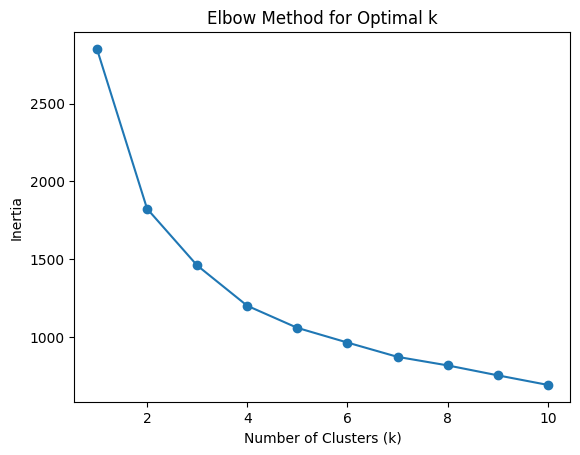

In [50]:
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### KMEANS CLUSTERING

In [52]:
# Choose the number of clusters (you need to decide this based on your data)
n_clusters = 5

In [53]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
s['Cluster'] = kmeans.fit_predict(s)

In [54]:
s

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),...,?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,Cluster
0,-1.145464,-0.504193,2.638821,-0.454671,0.993346,0.835743,0.927338,1.187501,1.466685,1.530366,...,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17,1
1,0.297628,-0.428165,-1.556747,-2.075996,0.606886,0.772211,0.467724,0.576516,0.807917,0.942871,...,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00,4
2,-0.075566,0.218074,0.159291,-2.075996,0.676085,0.764126,0.386616,0.385994,0.665830,0.727056,...,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15,1
3,0.467663,0.104032,-0.226090,-2.075996,0.688987,0.727162,-0.066238,0.064077,0.413948,0.673102,...,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11,1
4,0.141946,0.142046,0.202919,-1.072319,0.863744,0.918911,-0.208178,0.156053,0.562494,0.787004,...,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.210402,1.529559,0.602843,-0.242355,0.544137,0.585082,-0.018925,0.458261,0.659371,0.769020,...,0.379210,0.344578,0.300121,0.391520,0.346400,0.500961,1.941924,-0.287027,0.08,1
146,1.962649,0.465165,0.522858,1.475478,0.470246,0.525016,0.920579,1.450290,1.660441,1.830109,...,0.362266,0.312019,0.248113,0.364410,0.305718,0.407614,-0.430055,-0.437838,0.07,0
147,0.602367,-0.884333,0.253819,1.321066,-0.468049,-0.393302,0.825953,1.391162,1.757319,1.950006,...,0.243657,0.312019,0.300121,0.247500,0.312227,0.454287,0.835001,0.830752,0.16,1
148,-0.527154,-0.713270,-0.778713,-0.377465,-0.221747,-0.424490,0.717808,1.233489,1.453768,1.560340,...,0.345321,0.279461,0.187061,0.342384,0.278055,0.360941,-1.076958,-0.526551,0.07,1


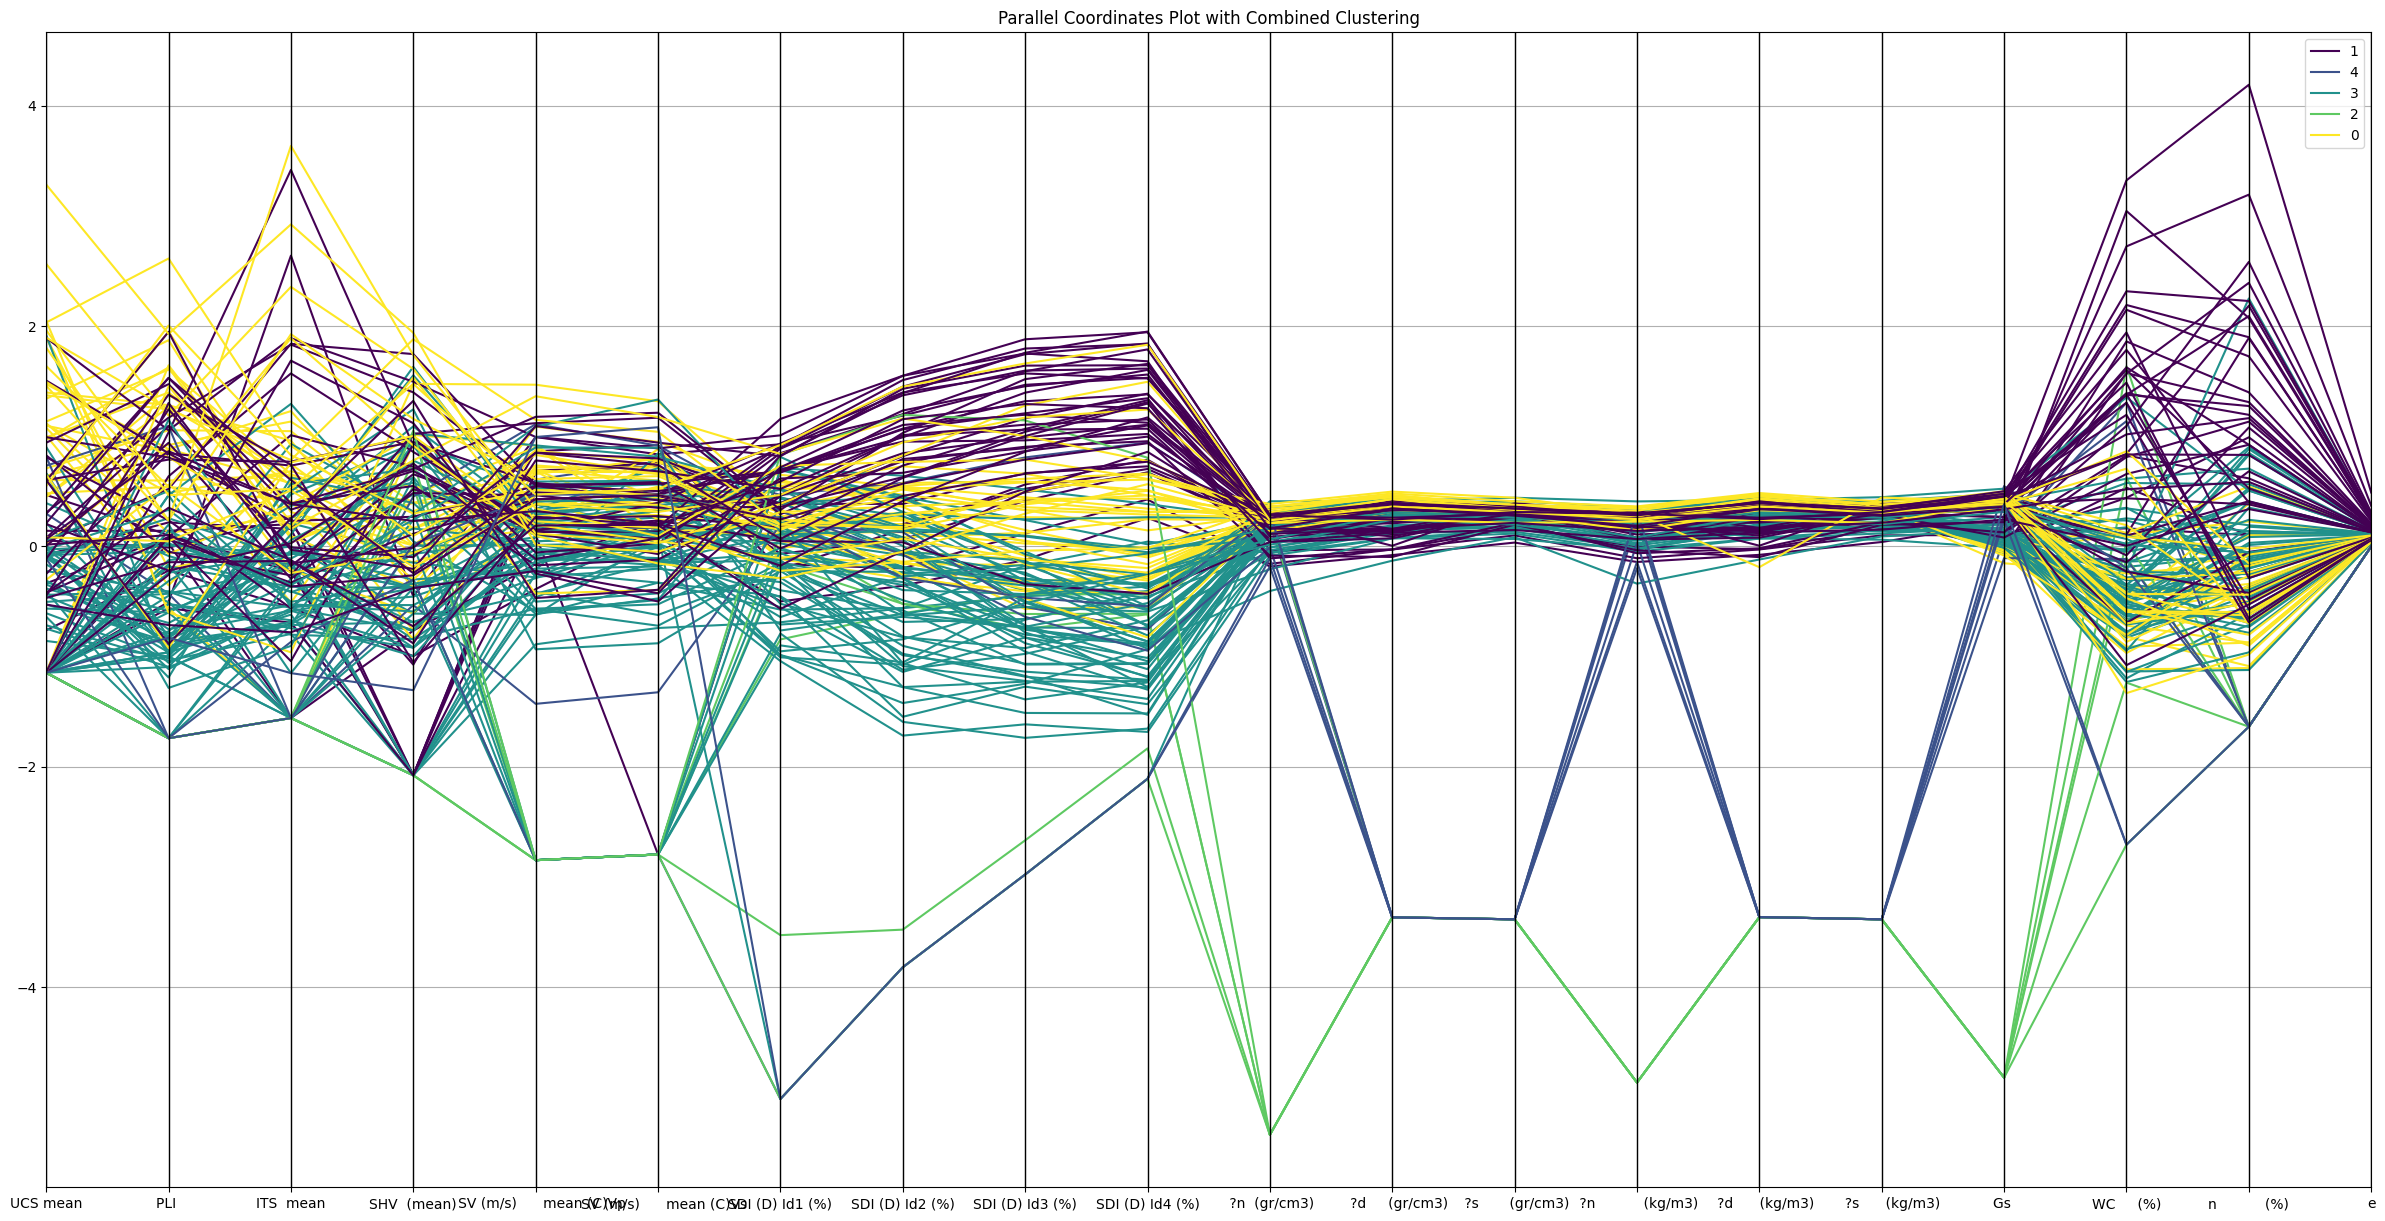

In [55]:
# Plotting
plt.figure(figsize=(30, 15))
pd.plotting.parallel_coordinates(s, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot with Combined Clustering')
plt.show()

### Adding GAD location

In [56]:
# Concatenating along rows (axis=0)
df12 = pd.concat([s, merged_df['GAD']], axis=1)
df12.head()

,UCS mean,PLI,ITS mean,SHV (mean),SV (m/s) mean (C)Vp,SV (m/s) mean (C)Vs,SDI (D) Id1 (%),SDI (D) Id2 (%),SDI (D) Id3 (%),SDI (D) Id4 (%),...,?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,Cluster,GAD
0,-1.145464,-0.504193,2.638821,-0.454671,0.993346,0.835743,0.927338,1.187501,1.466685,1.530366,...,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17,1,2
1,0.297628,-0.428165,-1.556747,-2.075996,0.606886,0.772211,0.467724,0.576516,0.807917,0.942871,...,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00,4,5
2,-0.075566,0.218074,0.159291,-2.075996,0.676085,0.764126,0.386616,0.385994,0.665830,0.727056,...,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15,1,5
3,0.467663,0.104032,-0.226090,-2.075996,0.688987,0.727162,-0.066238,0.064077,0.413948,0.673102,...,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11,1,5
4,0.141946,0.142046,0.202919,-1.072319,0.863744,0.918911,-0.208178,0.156053,0.562494,0.787004,...,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20,1,5


In [57]:
df12.columns

Index(['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)', ' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)', 'e',
       'Cluster', 'GAD'],
      dtype='object')

In [59]:
df12 = df12.drop(['UCS mean', 'PLI ', 'ITS  mean', 'SHV  (mean)',
       '   SV (m/s)      mean (C)Vp', '   SV (m/s)      mean (C)Vs',
       'SDI (D) Id1 (%)', 'SDI (D) Id2 (%)', 'SDI (D) Id3 (%)',
       'SDI (D) Id4 (%)', ' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)', 'e'], axis=1)
df12.head()

,Cluster,GAD
0,1,2
1,4,5
2,1,5
3,1,5
4,1,5


### Extract cluster 0 information

In [60]:
# Extract data points belonging to Cluster 1
cluster_0_data = df12[df12['Cluster'] == 0]
cluster_0_data

,Cluster,GAD
19,0,11
21,0,11
22,0,11
23,0,11
24,0,11
25,0,11
26,0,11
29,0,11
30,0,11
31,0,11


In [61]:
cluster_0_data.to_csv('combined cluster 0.csv', index=True)

### Extract cluster 1 information

In [62]:
# Extract data points belonging to Cluster 1
cluster_1_data = df12[df12['Cluster'] == 1]
cluster_1_data

,Cluster,GAD
0,1,2
2,1,5
3,1,5
4,1,5
5,1,5
6,1,5
7,1,6
8,1,7
18,1,10
92,1,14


In [63]:
cluster_1_data.to_csv('combined cluster 1.csv', index=True)

### Extract cluster 2 information

In [64]:
# Extract data points belonging to Cluster 1
cluster_2_data = df12[df12['Cluster'] == 2]
cluster_2_data

,Cluster,GAD
10,2,8
13,2,8
14,2,8
45,2,11
101,2,22
116,2,27


In [65]:
cluster_2_data.to_csv('combined cluster 2.csv', index=True)